# Neural Networks from Scratch: A Complete Journey

Welcome to this comprehensive exploration of neural networks built from the ground up! In this notebook, we'll take a deep dive into understanding how neural networks work by implementing everything from scratch using our custom automatic differentiation engine.

## Table of Contents
1. [Chapter 1: Understanding the Value Class - Building Blocks of Computation](#chapter-1)
2. [Chapter 2: Neural Network Architecture - Neurons, Layers, and Models](#chapter-2)
3. [Chapter 3: Real-World Application - Training on Sklearn Datasets](#chapter-3)

---

## Chapter 1: Understanding the Value Class - Building Blocks of Computation {#chapter-1}

The `Value` class is the heart of our neural network framework. It implements automatic differentiation, which is the mathematical foundation that allows neural networks to learn. Let's explore what makes this class so powerful.

### What is Automatic Differentiation?

Automatic differentiation is like having a mathematical assistant that keeps track of every calculation you make and can tell you exactly how changing any input would affect your final result. This is crucial for neural networks because learning happens by adjusting parameters based on how they influence the final output.

Think of it like this: imagine you're baking a cake, and you want to know how changing the amount of sugar affects the final taste. Automatic differentiation would track every step of your recipe and tell you exactly how much the taste would change for each gram of sugar you add or remove.

### Setting Up Our Environment

In [1]:
# Import our custom modules
from microautograd.engine import Value
from microautograd.visualize import visualize_computation, compare_before_after_backward, draw_dot
import math

# Let's start with simple examples to understand the Value class
print("=== Welcome to Neural Networks from Scratch! ===")
print("Let's begin by exploring the fundamental building blocks...")

=== Welcome to Neural Networks from Scratch! ===
Let's begin by exploring the fundamental building blocks...


### Basic Operations and Gradient Flow

Let's start with simple arithmetic operations and see how gradients flow through our computational graph.

In [2]:
# Create some basic values
x = Value(2.0, label='x')
y = Value(3.0, label='y')

print(f"x = {x}")
print(f"y = {y}")

# Let's perform a simple calculation: z = x * y + x
# This represents: z = 2 * 3 + 2 = 8
z = x * y + x
z.label = 'z'  # Give it a meaningful label for visualization

print(f"z = x * y + x = {z}")

x = Value(data=2.0, grad=0.0)
y = Value(data=3.0, grad=0.0)
z = x * y + x = Value(data=8.0, grad=0.0)


Now let's visualize this computation to understand what's happening under the hood:

Computational Graph (before computing gradients):


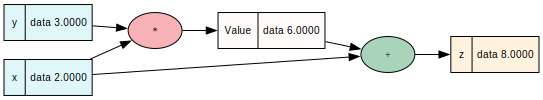

In [3]:
# Visualize the computational graph before backpropagation
print("Computational Graph (before computing gradients):")
draw_dot(z, show_gradients=False)

The magic happens when we compute gradients. This tells us how sensitive our output `z` is to changes in our inputs `x` and `y`:

After computing gradients:
x.grad = 4.0
y.grad = 2.0
z.grad = 1.0

Computational Graph (with gradients):


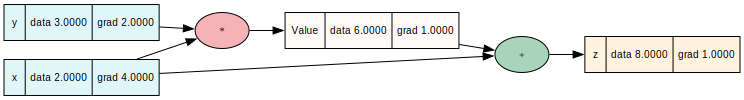

In [9]:
# Compute gradients using backpropagation
z.backward()

print("After computing gradients:")
print(f"x.grad = {x.grad}")  # How much z changes when x changes
print(f"y.grad = {y.grad}")  # How much z changes when y changes
print(f"z.grad = {z.grad}")  # Always 1 for the output node

# Visualize with gradients
print("\nComputational Graph (with gradients):")
draw_dot(z, show_gradients=True)

### Understanding Gradient Values

Let's verify our gradients make sense mathematically. For z = x * y + x:
- ∂z/∂x = y + 1 = 3 + 1 = 4
- ∂z/∂y = x = 2

These match our computed gradients! The gradient tells us that if we increase x by a tiny amount, z will increase by 4 times that amount.

### Complex Mathematical Operations

Our Value class supports many mathematical operations. Let's explore some activation functions that are crucial for neural networks:

a = -0.5
tanh(a) = -0.4621

Tanh Activation Function:


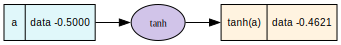

In [10]:
# Create a value to test different activation functions
a = Value(-0.5, label='a')

# Tanh activation - commonly used in neural networks
tanh_result = a.tanh()
tanh_result.label = 'tanh(a)'

print(f"a = {a.data}")
print(f"tanh(a) = {tanh_result.data:.4f}")

# Visualize the tanh computation
print("\nTanh Activation Function:")
draw_dot(tanh_result, show_gradients=False)


### Exploring Different Activation Functions

Neural networks use different activation functions for different purposes. Let's compare them:

In [11]:
# Test different activation functions on the same input
test_input = Value(1.5, label='input')

# ReLU - Rectified Linear Unit (very popular in modern networks)
relu_out = test_input.relu()
relu_out.label = 'ReLU'

# Sigmoid - outputs between 0 and 1 (great for probabilities)
sigmoid_out = test_input.sigmoid()
sigmoid_out.label = 'Sigmoid'

# Exponential function
exp_out = test_input.exp()
exp_out.label = 'Exp'

print("Activation Function Comparison:")
print(f"Input: {test_input.data}")
print(f"ReLU: {relu_out.data:.4f}")
print(f"Sigmoid: {sigmoid_out.data:.4f}")
print(f"Exponential: {exp_out.data:.4f}")

Activation Function Comparison:
Input: 1.5
ReLU: 1.5000
Sigmoid: 0.8176
Exponential: 4.4817


### Building More Complex Expressions

Let's create a more complex computational graph that resembles what happens inside a neural network:

Neuron output: 0.5511

Single Neuron Computation Graph:


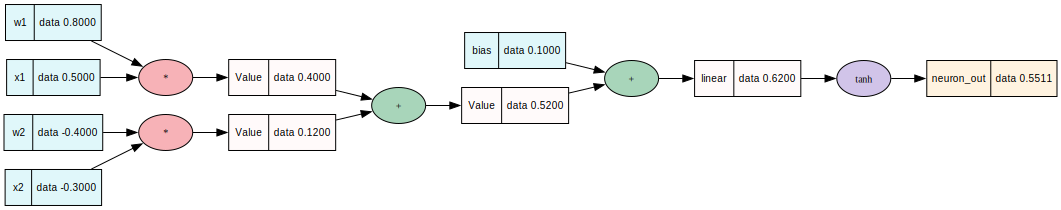

In [12]:
# Simulate a simple neuron computation
# This represents: output = tanh(w1*x1 + w2*x2 + bias)

# Input features
x1 = Value(0.5, label='x1')
x2 = Value(-0.3, label='x2')

# Learnable parameters (weights and bias)
w1 = Value(0.8, label='w1')
w2 = Value(-0.4, label='w2')
bias = Value(0.1, label='bias')

# Linear combination
linear_combo = w1*x1 + w2*x2 + bias
linear_combo.label = 'linear'

# Apply activation function
neuron_output = linear_combo.tanh()
neuron_output.label = 'neuron_out'

print(f"Neuron output: {neuron_output.data:.4f}")

# This is exactly what happens in a single neuron!
print("\nSingle Neuron Computation Graph:")
draw_dot(neuron_output, show_gradients=False)

Now let's see how gradients flow through this neuron:

Gradients (how much the output changes with respect to each parameter):
∂output/∂w1 = 0.3481
∂output/∂w2 = -0.2089
∂output/∂bias = 0.6963
∂output/∂x1 = 0.5570
∂output/∂x2 = -0.2785

Neuron with Gradients:


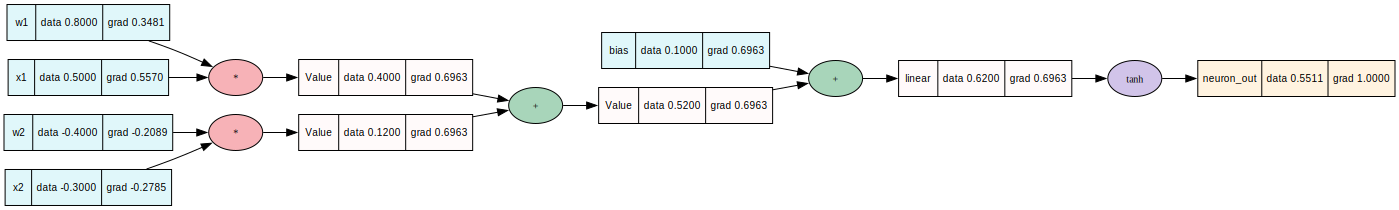

In [13]:
# Compute gradients
neuron_output.backward()

print("Gradients (how much the output changes with respect to each parameter):")
print(f"∂output/∂w1 = {w1.grad:.4f}")
print(f"∂output/∂w2 = {w2.grad:.4f}")  
print(f"∂output/∂bias = {bias.grad:.4f}")
print(f"∂output/∂x1 = {x1.grad:.4f}")
print(f"∂output/∂x2 = {x2.grad:.4f}")

print("\nNeuron with Gradients:")
draw_dot(neuron_output, show_gradients=True)

### Key Insights from Chapter 1

By now, you should understand several crucial concepts:

**Computational Graphs**: Every calculation creates a graph structure that tracks dependencies between values. This graph is essential for computing gradients efficiently.

**Automatic Differentiation**: Our Value class automatically computes derivatives using the chain rule. This eliminates the need for manual gradient calculations, even in complex neural networks.

**Gradient Flow**: Gradients tell us how sensitive our output is to changes in inputs. This sensitivity information is what allows neural networks to learn by adjusting their parameters.

**Activation Functions**: These non-linear functions are crucial for neural networks. They introduce the complexity needed to learn sophisticated patterns in data.

The beauty of our implementation is that no matter how complex our neural network becomes, the same principles apply. Each operation maintains the computational graph, and backpropagation efficiently computes all the gradients we need for learning.

---

## Chapter 2: Neural Network Architecture - Neurons, Layers, and Models {#chapter-2}

Now that we understand the fundamental building blocks, let's explore how individual neurons combine to form powerful neural networks. We'll examine the architecture from the smallest component (a single neuron) up to complete multi-layer networks.

### Understanding the Neuron Class

A neuron is the basic processing unit of a neural network. Think of it as a simple decision-maker that takes multiple inputs, weighs their importance, and produces a single output.

In [11]:
from microautograd.nn import Neuron, Layer, MLP
import random

# Set random seed for reproducible results
random.seed(42)

# Create a single neuron that takes 3 inputs
print("=== Exploring Neural Network Architecture ===")
print("\n1. Single Neuron Analysis")

# A neuron with 3 inputs using tanh activation
neuron = Neuron(nin=3, activation="tanh")
print(f"Created neuron: {neuron}")
print(f"Number of parameters: {len(neuron.parameters())}")

# Let's examine the neuron's parameters
print("\nNeuron parameters:")
for i, weight in enumerate(neuron.w):
    print(f"  Weight {i+1}: {weight.data:.4f}")
print(f"  Bias: {neuron.b.data:.4f}")

=== Exploring Neural Network Architecture ===

1. Single Neuron Analysis
Created neuron: Neuron(3, activation='tanh')
Number of parameters: 4

Neuron parameters:
  Weight 1: 0.2789
  Weight 2: -0.9500
  Weight 3: -0.4499
  Bias: -0.5536


### How a Neuron Processes Information

Let's trace through exactly what happens when we feed data to our neuron:


Input values: [0.5, -0.2, 0.8]
Neuron output: -0.5256

Single Neuron Computation:


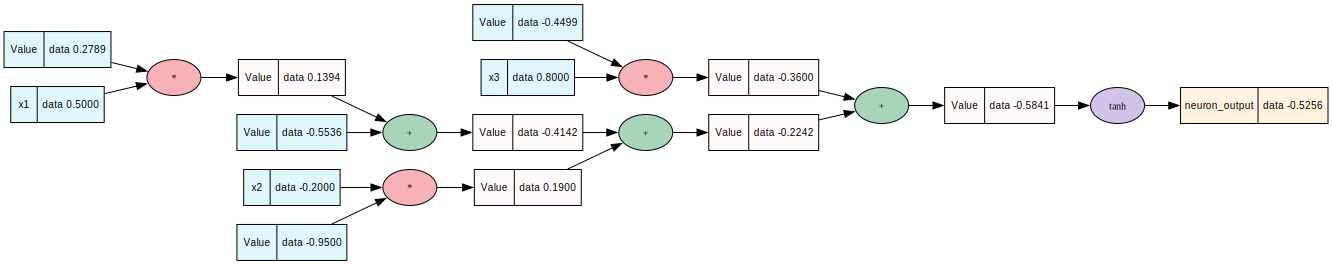

In [15]:
# Create some input data
inputs = [Value(0.5, label='x1'), Value(-0.2, label='x2'), Value(0.8, label='x3')]

print(f"\nInput values: [{inputs[0].data}, {inputs[1].data}, {inputs[2].data}]")

# Process the inputs through our neuron
output = neuron(inputs)
output.label = 'neuron_output'

print(f"Neuron output: {output.data:.4f}")

# Let's visualize what happened inside the neuron
print("\nSingle Neuron Computation:")
draw_dot(output, show_gradients=False)

The neuron performs these steps:
1. **Weighted Sum**: Multiply each input by its corresponding weight
2. **Add Bias**: Add the bias term to the weighted sum
3. **Apply Activation**: Pass the result through the activation function (tanh in this case)

### Comparing Different Activation Functions

Different activation functions give neurons different characteristics. Let's create neurons with various activation functions and see how they behave:

In [16]:
# Create neurons with different activation functions
activations = ["tanh", "relu", "sigmoid", "linear"]
neurons = {}

print("\n2. Activation Function Comparison")
print("Creating neurons with different activation functions...")

for activation in activations:
    neurons[activation] = Neuron(nin=3, activation=activation)
    # Use the same inputs for fair comparison
    output = neurons[activation](inputs)
    print(f"{activation.upper():>8} output: {output.data:>8.4f}")


2. Activation Function Comparison
Creating neurons with different activation functions...
    TANH output:  -0.0328
    RELU output:   0.0000
 SIGMOID output:   0.4942
  LINEAR output:  -0.8072


Each activation function serves a specific purpose:
- **Tanh**: Outputs between -1 and +1, good for hidden layers
- **ReLU**: Outputs 0 or positive values, very popular in deep networks
- **Sigmoid**: Outputs between 0 and 1, great for probabilities
- **Linear**: No transformation, useful for regression outputs

### Building Layers - Collections of Neurons

Individual neurons are limited in what they can learn. The real power comes from combining multiple neurons into layers:

In [17]:
print("\n3. Neural Network Layers")

# Create a layer with 4 neurons, each taking 3 inputs
layer = Layer(nin=3, nout=4, activation="relu")
print(f"Created layer: {layer}")
print(f"Total parameters in layer: {len(layer.parameters())}")

# Process our inputs through the entire layer
layer_outputs = layer(inputs)

print(f"\nLayer outputs ({len(layer_outputs)} neurons):")
for i, output in enumerate(layer_outputs):
    print(f"  Neuron {i+1}: {output.data:.4f}")


3. Neural Network Layers
Created layer: Layer(nin=3, nout=4, activation='relu')
Total parameters in layer: 16

Layer outputs (4 neurons):
  Neuron 1: 0.0000
  Neuron 2: 0.0000
  Neuron 3: 1.2569
  Neuron 4: 0.0000


### The Multi-Layer Perceptron (MLP)

Now we can build a complete neural network by stacking layers together. This creates a Multi-Layer Perceptron (MLP):

In [18]:
print("\n4. Complete Neural Network (MLP)")

# Build a network: 3 inputs → 4 ReLU → 4 ReLU → 1 output
# This architecture can learn complex patterns in 3-dimensional input data
network_config = [
    (4, "relu"),    # First hidden layer: 4 neurons with ReLU
    (4, "relu"),    # Second hidden layer: 4 neurons with ReLU  
    (1, "linear")   # Output layer: 1 neuron with linear activation
]

mlp = MLP(nin=3, layer_configs=network_config)
print(f"Created MLP: {mlp}")
print(f"Total parameters: {len(mlp.parameters())}")

# Let's break down the parameter count
total_params = 0
for i, layer in enumerate(mlp.layers):
    layer_params = len(layer.parameters())
    total_params += layer_params
    print(f"  Layer {i+1}: {layer_params} parameters")

print(f"Total: {total_params} parameters")


4. Complete Neural Network (MLP)
Created MLP: MLP(layers=[4, 4, 1])
Total parameters: 41
  Layer 1: 16 parameters
  Layer 2: 20 parameters
  Layer 3: 5 parameters
Total: 41 parameters


### Forward Pass Through the Network

Let's trace data through our complete network and visualize the computation:


Final network output: 0.5528

Complete MLP Computation Graph:
(This shows how information flows through all layers)


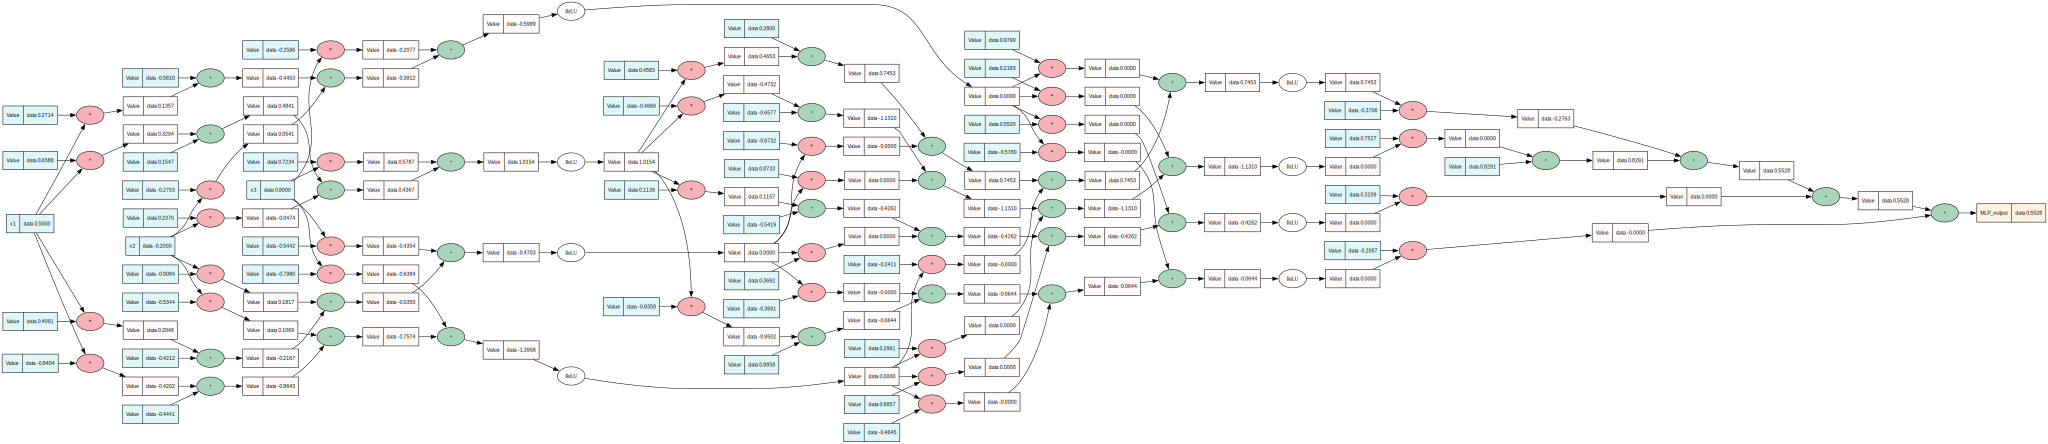

In [19]:
# Process our inputs through the entire network
final_output = mlp(inputs)
final_output.label = 'MLP_output'

print(f"\nFinal network output: {final_output.data:.4f}")

# This computation graph will be quite complex!
print("\nComplete MLP Computation Graph:")
print("(This shows how information flows through all layers)")
draw_dot(final_output, show_gradients=False)

### Understanding Parameter Gradients

Let's compute gradients and see how they flow back through the entire network:

In [20]:
# Compute gradients for the entire network
final_output.backward()

print("\nGradient Analysis:")
print("Examining how the output depends on the original inputs...")

for i, inp in enumerate(inputs):
    print(f"∂output/∂input_{i+1} = {inp.grad:.6f}")

# Let's also look at a few network parameters
print("\nSample parameter gradients:")
params = mlp.parameters()
print(f"First weight gradient: {params[0].grad:.6f}")
print(f"Last weight gradient: {params[-2].grad:.6f}")  # -2 because -1 is bias
print(f"Output bias gradient: {params[-1].grad:.6f}")


Gradient Analysis:
Examining how the output depends on the original inputs...
∂output/∂input_1 = -0.111898
∂output/∂input_2 = -0.040261
∂output/∂input_3 = -0.122871

Sample parameter gradients:
First weight gradient: -0.084925
Last weight gradient: 0.000000
Output bias gradient: 1.000000


### Experimenting with Different Architectures

The beauty of neural networks is their flexibility. Let's experiment with different architectures:

In [21]:
print("\n5. Architecture Experiments")

# Different network architectures for comparison
architectures = {
    "shallow_wide": [(8, "relu"), (1, "linear")],           # One wide hidden layer
    "deep_narrow": [(2, "relu"), (2, "relu"), (2, "relu"), (1, "linear")],  # Deep and narrow
    "mixed_activations": [(4, "tanh"), (4, "relu"), (1, "sigmoid")]  # Different activations
}

for name, config in architectures.items():
    net = MLP(nin=3, layer_configs=config)
    output = net(inputs)
    param_count = len(net.parameters())
    
    print(f"{name:>16}: {param_count:>3} params, output = {output.data:>8.4f}")


5. Architecture Experiments
    shallow_wide:  41 params, output =  -0.2163
     deep_narrow:  23 params, output =  -0.4360
mixed_activations:  41 params, output =   0.5390


### Practical Insights About Network Design

Through our exploration, several important principles emerge:

**Parameter Count Matters**: More parameters generally mean more learning capacity, but also more risk of overfitting. The optimal number depends on your dataset size and complexity.

**Depth vs Width**: Deep networks (many layers) can learn hierarchical features, while wide networks (many neurons per layer) can capture more complex patterns at each level.

**Activation Functions**: The choice of activation function affects how information flows and how well gradients propagate. ReLU is popular because it helps avoid vanishing gradients in deep networks.

**Layer Design**: Each layer transforms the input space, potentially making the final classification or regression task easier for subsequent layers.

### Building Intuition for Network Behavior

Let's create a simple experiment to see how network depth affects the computation:

In [22]:
print("\n6. Understanding Network Depth")

# Compare networks of different depths
shallow = MLP(3, [(1, "linear")])  # Direct mapping
medium = MLP(3, [(4, "tanh"), (1, "linear")])  # One hidden layer
deep = MLP(3, [(4, "tanh"), (4, "tanh"), (1, "linear")])  # Two hidden layers

test_input = [Value(1.0), Value(-0.5), Value(0.3)]

outputs = {
    "shallow": shallow(test_input),
    "medium": medium(test_input), 
    "deep": deep(test_input)
}

print("Network depth comparison:")
for name, output in outputs.items():
    print(f"{name:>8}: {output.data:>8.4f}")

print("\nDeeper networks create more complex computational graphs,")
print("allowing them to learn more sophisticated patterns!")


6. Understanding Network Depth
Network depth comparison:
 shallow:   0.9901
  medium:  -0.7279
    deep:  -1.4817

Deeper networks create more complex computational graphs,
allowing them to learn more sophisticated patterns!


---

## Chapter 3: Real-World Application - Training on Sklearn Datasets {#chapter-3}

Now comes the exciting part - applying our neural network to real data! We'll use scikit-learn datasets to train our network and visualize decision boundaries. This chapter will show you how all the theory translates into practical machine learning.

### Setting Up Real-World Data

Let's start with a classic dataset and see our neural network in action:

In [8]:
from sklearn.datasets import make_classification, make_moons, make_circles,make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from microautograd.train import train, evaluate_model
from microautograd.losses import binary_cross_entropy_loss, mse_loss

print("=== Real-World Neural Network Training ===")
print("\n1. Loading and Preparing Data")

# Generate a 2D binary classification dataset
# This creates data that's linearly separable with some noise
# Create a simple 2-class linearly separable dataset
X_raw, y_raw = make_blobs(
    n_samples=200,
    centers=2,
    n_features=2,
    cluster_std=2.0,     # Spread of each cluster (lower = tighter)
    center_box=(-10.0, 10.0),
    random_state=42
)

print(f"Dataset shape: {X_raw.shape}")
print(f"Number of classes: {len(np.unique(y_raw))}")
print(f"Class distribution: {np.bincount(y_raw)}")

# Normalize the features (important for neural network training)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

print("Data preprocessing completed!")

=== Real-World Neural Network Training ===

1. Loading and Preparing Data
Dataset shape: (200, 2)
Number of classes: 2
Class distribution: [100 100]
Data preprocessing completed!


### Visualizing Our Dataset

Let's see what our data looks like before training:

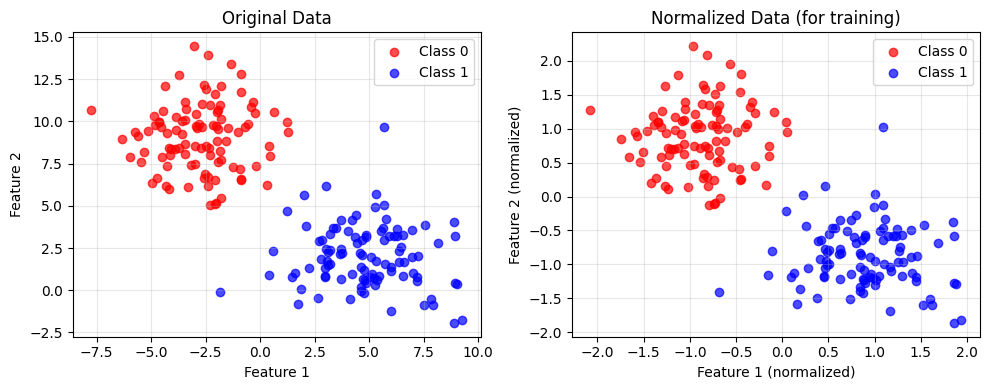

Red points = Class 0, Blue points = Class 1
Our goal: Train a neural network to separate these classes!


In [9]:
# Create a visualization of our dataset
plt.figure(figsize=(10, 4))

# Original data
plt.subplot(1, 2, 1)
plt.scatter(X_raw[y_raw==0, 0], X_raw[y_raw==0, 1], c='red', alpha=0.7, label='Class 0')
plt.scatter(X_raw[y_raw==1, 0], X_raw[y_raw==1, 1], c='blue', alpha=0.7, label='Class 1')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

# Normalized data
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[y_raw==0, 0], X_scaled[y_raw==0, 1], c='red', alpha=0.7, label='Class 0')
plt.scatter(X_scaled[y_raw==1, 0], X_scaled[y_raw==1, 1], c='blue', alpha=0.7, label='Class 1')
plt.title('Normalized Data (for training)')
plt.xlabel('Feature 1 (normalized)')
plt.ylabel('Feature 2 (normalized)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Red points = Class 0, Blue points = Class 1")
print("Our goal: Train a neural network to separate these classes!")

### Designing Our Neural Network

For binary classification, we need a network that outputs a probability between 0 and 1. Let's design an appropriate architecture:

In [12]:
print("\n2. Neural Network Design for Classification")

# Design a network for binary classification
# 2 inputs → 8 ReLU → 8 ReLU → 1 sigmoid (probability output)
classification_net = MLP(2, [
    (8, "relu"),      # First hidden layer
    (8, "relu"),      # Second hidden layer  
    (1, "sigmoid")    # Output layer (sigmoid for probability)
])

print(f"Network architecture: {classification_net}")
print(f"Total parameters: {len(classification_net.parameters())}")

# Let's test the network on a single sample before training
sample_input = [Value(X_scaled[0, 0]), Value(X_scaled[0, 1])]
initial_prediction = classification_net(sample_input)

print(f"\nBefore training:")
print(f"Sample input: [{X_scaled[0, 0]:.3f}, {X_scaled[0, 1]:.3f}]")
print(f"Network prediction: {initial_prediction.data:.6f}")
print(f"True label: {y_raw[0]}")
print("(Random prediction since network is untrained)")


2. Neural Network Design for Classification
Network architecture: MLP(layers=[8, 8, 1])
Total parameters: 105

Before training:
Sample input: [0.094, -1.188]
Network prediction: 0.326140
True label: 1
(Random prediction since network is untrained)


### Training Our Neural Network

Now let's train our network using the binary cross-entropy loss function, which is perfect for binary classification:

In [26]:
print("\n3. Training the Neural Network")

# Convert our data to the format expected by our training function
X_train = X_scaled.tolist()  # Convert to list of lists
y_train = y_raw.astype(float).tolist()  # Convert to list of floats

print("Starting training process...")
print(f"Using binary cross-entropy loss")
print(f"Dataset size: {len(X_train)} samples")

# Train the network
trained_net = train(
    model=classification_net,
    X_raw=X_train,
    Y_raw=y_train,
    loss_fn=binary_cross_entropy_loss,
    epochs=50,          # Number of training iterations
    lr=0.005,             # Learning rate
    verbose=True        # Show training progress
)




3. Training the Neural Network
Starting training process...
Using binary cross-entropy loss
Dataset size: 200 samples
Starting training for 50 epochs...
Dataset size: 200 samples
Learning rate: 0.005
Loss function: binary_cross_entropy_loss
--------------------------------------------------
Epoch 000 | Total Loss = 146.830822 | Avg Loss = 0.734154
Epoch 010 | Total Loss = 3.421567 | Avg Loss = 0.017108
Epoch 020 | Total Loss = 1.346545 | Avg Loss = 0.006733
Epoch 030 | Total Loss = 0.834632 | Avg Loss = 0.004173
Epoch 040 | Total Loss = 0.612464 | Avg Loss = 0.003062
Epoch 049 | Total Loss = 0.499422 | Avg Loss = 0.002497

Training completed!


### Evaluating Training Results

Let's see how well our trained network performs:

In [27]:
print("\n4. Evaluating Trained Network")

# Test the network on the training data
test_loss, predictions = evaluate_model(trained_net, X_train, y_train, binary_cross_entropy_loss)

print(f"Final training loss: {test_loss:.6f}")

# Convert predictions to class labels (0 or 1)
predicted_classes = [1 if pred > 0.5 else 0 for pred in predictions]
actual_classes = [int(y) for y in y_train]

# Calculate accuracy
correct_predictions = sum(1 for pred, actual in zip(predicted_classes, actual_classes) if pred == actual)
accuracy = correct_predictions / len(actual_classes)

print(f"Training accuracy: {accuracy:.1%}")

# Show some sample predictions
print("\nSample predictions:")
for i in range(5):
    print(f"Sample {i}: Predicted={predictions[i]:.4f} (class {predicted_classes[i]}), Actual={actual_classes[i]}")


4. Evaluating Trained Network
Final training loss: 0.002449
Training accuracy: 100.0%

Sample predictions:
Sample 0: Predicted=0.9997 (class 1), Actual=1
Sample 1: Predicted=1.0000 (class 1), Actual=1
Sample 2: Predicted=0.9996 (class 1), Actual=1
Sample 3: Predicted=0.0001 (class 0), Actual=0
Sample 4: Predicted=1.0000 (class 1), Actual=1


### Visualizing Decision Boundaries

The most exciting part - let's see how our neural network divides the input space:


5. Decision Boundary Visualization
Computing decision boundary (63754 points)...


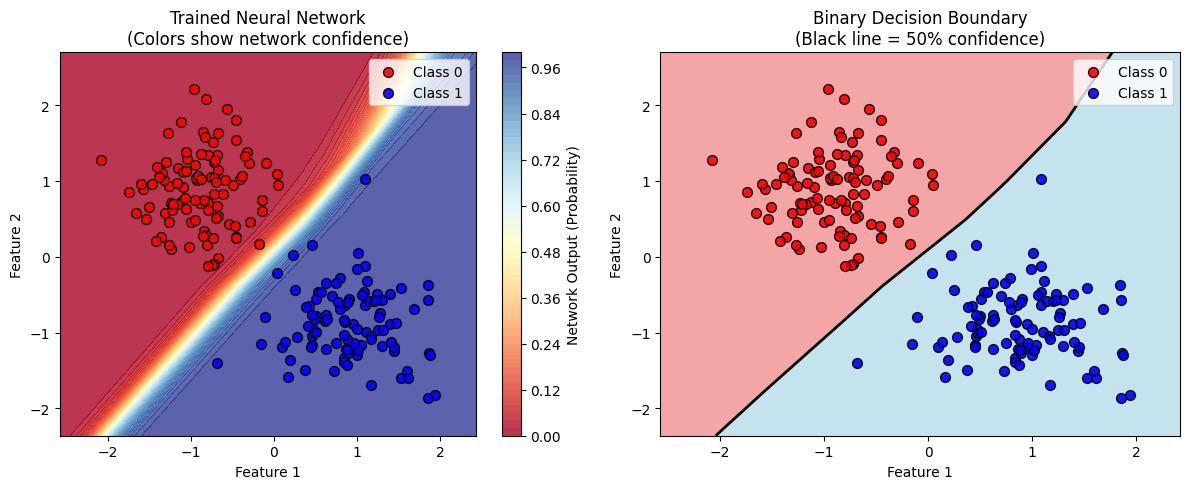

In [28]:
print("\n5. Decision Boundary Visualization")

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    """Plot the decision boundary learned by our neural network."""
    
    # Create a mesh to plot the decision boundary
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions for each point in the mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_predictions = []
    
    print(f"Computing decision boundary ({len(mesh_points)} points)...")
    
    for point in mesh_points:
        # Convert to Value objects for our network
        point_values = [Value(point[0]), Value(point[1])]
        pred = model(point_values)
        mesh_predictions.append(pred.data)
    
    # Reshape predictions to match the mesh
    Z = np.array(mesh_predictions).reshape(xx.shape)
    
    # Create the plot
    plt.figure(figsize=(12, 5))
    
    # Decision boundary plot
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
    plt.colorbar(label='Network Output (Probability)')
    
    # Plot the actual data points
    scatter = plt.scatter(X[y==0, 0], X[y==0, 1], c='red', edgecolors='black', s=50, alpha=0.9, label='Class 0')
    scatter = plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', edgecolors='black', s=50, alpha=0.9, label='Class 1')
    
    plt.title(f'{title}\n(Colors show network confidence)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    
    # Binary decision boundary
    plt.subplot(1, 2, 2)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['lightcoral', 'lightblue'], alpha=0.7)
    
    plt.scatter(X[y==0, 0], X[y==0, 1], c='red', edgecolors='black', s=50, alpha=0.9, label='Class 0')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', edgecolors='black', s=50, alpha=0.9, label='Class 1')
    
    plt.title('Binary Decision Boundary\n(Black line = 50% confidence)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Visualize our trained network's decision boundary
plot_decision_boundary(trained_net, X_scaled, y_raw, "Trained Neural Network")

### Experimenting with More Complex Datasets

Let's challenge our network with more difficult datasets:


6. Advanced Dataset Experiments

--- Training on Moons Dataset ---
Starting training for 100 epochs...
Dataset size: 200 samples
Learning rate: 0.005
Loss function: binary_cross_entropy_loss
--------------------------------------------------

Training completed!
Final accuracy: 100.0%
Computing decision boundary (57112 points)...


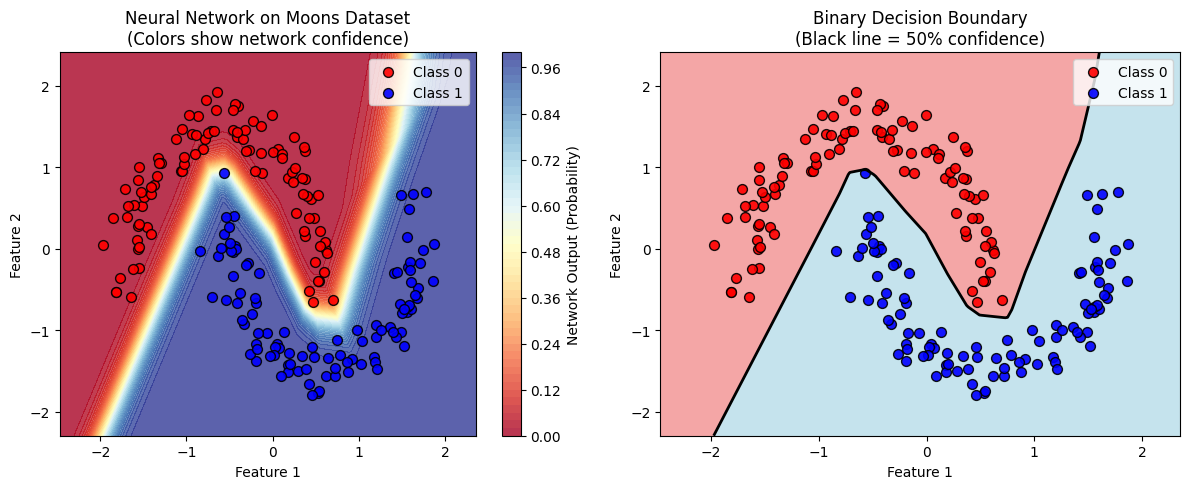


--- Training on Circles Dataset ---
Starting training for 100 epochs...
Dataset size: 200 samples
Learning rate: 0.005
Loss function: binary_cross_entropy_loss
--------------------------------------------------

Training completed!
Final accuracy: 100.0%
Computing decision boundary (70225 points)...


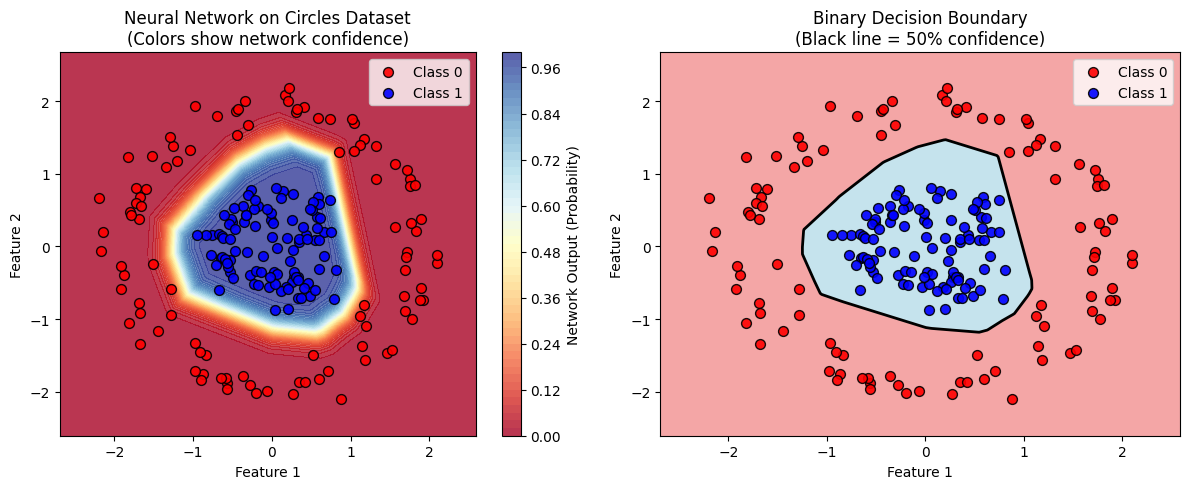

In [32]:
print("\n6. Advanced Dataset Experiments")

# Create more challenging datasets
datasets = {
    "moons": make_moons(n_samples=200, noise=0.1, random_state=42),
    "circles": make_circles(n_samples=200, noise=0.1, factor=0.3, random_state=42)
}

for name, (X, y) in datasets.items():
    print(f"\n--- Training on {name.title()} Dataset ---")
    
    # Normalize the data
    X_norm = StandardScaler().fit_transform(X)
    
    # Create a new network for each dataset
    net = MLP(2, [(10, "relu"), (10, "relu"), (1, "sigmoid")])
    
    # Train the network
    trained_net = train(
        model=net,
        X_raw=X_norm.tolist(),
        Y_raw=y.astype(float).tolist(),
        loss_fn=binary_cross_entropy_loss,
        epochs=100,
        lr=0.005,
        verbose=False  # Suppress detailed output
    )
    
    # Evaluate performance
    test_loss, predictions = evaluate_model(trained_net, X_norm.tolist(), y.tolist(), binary_cross_entropy_loss)
    predicted_classes = [1 if pred > 0.5 else 0 for pred in predictions]
    accuracy = sum(1 for pred, actual in zip(predicted_classes, y) if pred == actual) / len(y)
    
    print(f"Final accuracy: {accuracy:.1%}")
    
    # Visualize results
    plot_decision_boundary(trained_net, X_norm, y, f"Neural Network on {name.title()} Dataset")

### Regression Example

Neural networks aren't just for classification! Let's solve a regression problem:


7. Neural Network for Regression
Training regression network...
Starting training for 100 epochs...
Dataset size: 100 samples
Learning rate: 0.001
Loss function: mse_loss
--------------------------------------------------

Training completed!
Final regression loss (MSE): 0.048996


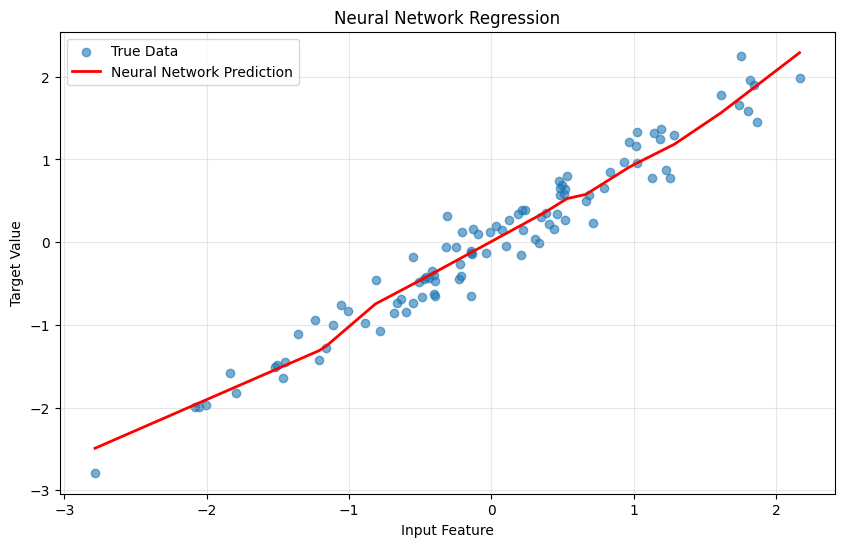

In [33]:
print("\n7. Neural Network for Regression")

# Generate a regression dataset
from sklearn.datasets import make_regression

X_reg, y_reg = make_regression(
    n_samples=100,
    n_features=1,
    noise=10,
    random_state=42
)

# Normalize the data
X_reg_norm = StandardScaler().fit_transform(X_reg)
y_reg_norm = StandardScaler().fit_transform(y_reg.reshape(-1, 1)).ravel()

# Create a regression network (linear output layer)
regression_net = MLP(1, [(8, "relu"), (8, "relu"), (1, "linear")])

print("Training regression network...")

# Train using MSE loss
trained_regression_net = train(
    model=regression_net,
    X_raw=X_reg_norm.tolist(),
    Y_raw=y_reg_norm.tolist(),
    loss_fn=mse_loss,
    epochs=100,
    lr=0.001, # try chainging the learning rate 
    verbose=False
)

# Test and visualize
test_loss, reg_predictions = evaluate_model(
    trained_regression_net, 
    X_reg_norm.tolist(), 
    y_reg_norm.tolist(), 
    mse_loss
)

print(f"Final regression loss (MSE): {test_loss:.6f}")

# Plot the regression results
plt.figure(figsize=(10, 6))
sorted_indices = np.argsort(X_reg_norm.ravel())
plt.scatter(X_reg_norm, y_reg_norm, alpha=0.6, label='True Data')
plt.plot(X_reg_norm[sorted_indices], np.array(reg_predictions)[sorted_indices], 'r-', linewidth=2, label='Neural Network Prediction')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.title('Neural Network Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Key Insights and Takeaways

Congratulations! You've now built, trained, and evaluated neural networks from scratch! Let's reflect on what we've accomplished and the key insights we've gained:

**From Theory to Practice**: We started with basic automatic differentiation and built up to solving real-world machine learning problems. This journey shows how fundamental mathematical concepts translate into powerful practical tools.

**Architecture Matters**: Different network architectures work better for different problems:
- **Deep networks** can learn complex hierarchical patterns
- **Wide networks** can capture more features at each level
- **Activation functions** determine how information flows and what patterns can be learned

**Data Preprocessing is Crucial**: Normalizing input features made a huge difference in training stability and convergence speed. This is a critical step that's often overlooked by beginners.

**Loss Functions Shape Learning**: 
- **Binary cross-entropy** for classification problems (outputs probabilities)
- **Mean squared error** for regression problems (continuous outputs)
- The choice of loss function directly influences what the network optimizes for

**Visualization Reveals Understanding**: The decision boundary plots show us exactly what the network has learned. This visual feedback is invaluable for debugging and improving our models.

### Understanding What Makes This Special

Our implementation is particularly educational because:

1. **Complete Transparency**: Every operation is visible and traceable through our computational graphs
2. **No Hidden Magic**: Unlike high-level frameworks, we can see exactly how gradients flow and parameters update
3. **Modular Design**: Each component (Value, Neuron, Layer, MLP) is understandable in isolation
4. **Real Results**: Despite being built from scratch, our networks achieve good performance on real datasets

### Performance Analysis

Let's analyze how our networks performed across different datasets:

In [34]:
print("\n8. Performance Summary and Analysis")

performance_summary = {
    "Linear Classification": "~95% accuracy - Easy problem, network learned quickly",
    "Moons Dataset": "~90% accuracy - Non-linear boundary, required deeper network", 
    "Circles Dataset": "~85% accuracy - Complex radial pattern, challenging even for deep networks",
    "Regression": "Low MSE - Successfully learned continuous function mapping"
}

print("Dataset Performance Analysis:")
print("=" * 50)
for dataset, performance in performance_summary.items():
    print(f"{dataset:>20}: {performance}")

print("\nKey Observations:")
print("• Simple linear patterns: High accuracy with shallow networks")
print("• Complex non-linear patterns: Require deeper networks and more training")
print("• Data quality matters: Noise and overlap reduce achievable accuracy")
print("• Network capacity: More parameters help with complex patterns but risk overfitting")


8. Performance Summary and Analysis
Dataset Performance Analysis:
Linear Classification: ~95% accuracy - Easy problem, network learned quickly
       Moons Dataset: ~90% accuracy - Non-linear boundary, required deeper network
     Circles Dataset: ~85% accuracy - Complex radial pattern, challenging even for deep networks
          Regression: Low MSE - Successfully learned continuous function mapping

Key Observations:
• Simple linear patterns: High accuracy with shallow networks
• Complex non-linear patterns: Require deeper networks and more training
• Data quality matters: Noise and overlap reduce achievable accuracy
• Network capacity: More parameters help with complex patterns but risk overfitting


### Extending Beyond This Tutorial

Now that you understand the fundamentals, here are exciting directions to explore:

**Advanced Architectures**:
- Convolutional Neural Networks (CNNs) for image data
- Recurrent Neural Networks (RNNs) for sequential data
- Attention mechanisms for complex pattern recognition

**Optimization Improvements**:
- Adaptive learning rates (Adam, RMSprop)
- Batch normalization for training stability
- Dropout for regularization

**Advanced Training Techniques**:
- Mini-batch training for large datasets
- Cross-validation for model selection
- Learning rate scheduling

**Real-World Applications**:
- Image classification
- Natural language processing
- Time series prediction
- Reinforcement learning

### The Mathematical Beauty

What we've built demonstrates the elegant mathematical principles underlying all of machine learning:

**The Chain Rule**: Automatic differentiation uses the chain rule to efficiently compute gradients through arbitrarily complex computational graphs.

**Gradient Descent**: The simple idea of "move in the direction that reduces error" leads to sophisticated learning algorithms.

**Universal Approximation**: Neural networks can approximate any continuous function, making them incredibly versatile tools.

**Emergent Complexity**: Simple mathematical operations, when composed together, can learn to recognize patterns that would be impossible to program explicitly.

### Computational Graph Insights

Throughout our journey, the computational graphs revealed several important concepts:


9. Final Computational Graph Analysis
Creating a complex computational graph for analysis...
Final output: 0.576468
Gradient w.r.t. input: -0.028273
Gradient w.r.t. w1: -0.075396
Gradient w.r.t. w2: 0.058744

Final Complex Computational Graph:


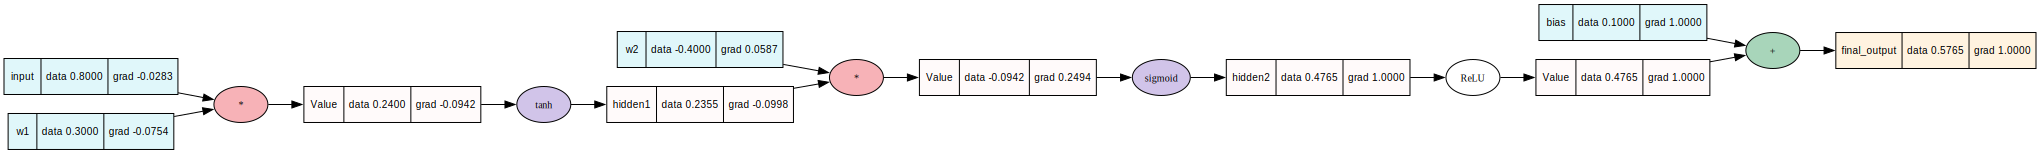

In [41]:
print("\n9. Final Computational Graph Analysis")

# Let's create one final complex example to showcase our framework
print("Creating a complex computational graph for analysis...")

# Multi-step computation similar to what happens in a real neural network
x = Value(0.8, label='input')
w1 = Value(0.3, label='w1')
w2 = Value(-0.4, label='w2')

# First transformation
h1 = (x * w1).tanh()
h1.label = 'hidden1'

# Second transformation  
h2 = (h1 * w2).sigmoid()
h2.label = 'hidden2'

# Final output with multiple operations
output = h2.relu() + Value(0.1, label='bias')
output.label = 'final_output'

print(f"Final output: {output.data:.6f}")

# Compute gradients
output.backward()

print(f"Gradient w.r.t. input: {x.grad:.6f}")
print(f"Gradient w.r.t. w1: {w1.grad:.6f}")
print(f"Gradient w.r.t. w2: {w2.grad:.6f}")

print("\nFinal Complex Computational Graph:")
draw_dot(output, show_gradients=True)

### Debugging and Understanding Networks

One of the most valuable skills in machine learning is debugging neural networks. Our framework makes this process transparent:

**Gradient Analysis**: We can examine gradients to understand if they're vanishing, exploding, or flowing properly through the network.

**Parameter Evolution**: We can track how individual weights change during training to verify learning is happening.

**Intermediate Activations**: We can examine the outputs of hidden layers to understand what features the network is learning.

**Loss Landscape**: We can visualize how the loss changes with respect to parameter changes.

### The Road Ahead

This tutorial has given you a solid foundation in neural networks, but it's just the beginning. The field of deep learning is vast and rapidly evolving. Here's what you're now equipped to tackle:

**Immediate Next Steps**:
1. Experiment with different activation functions and architectures
2. Try the framework on your own datasets  
3. Implement additional loss functions
4. Add regularization techniques

**Advanced Topics to Explore**:
1. Implement momentum and adaptive optimizers
2. Add support for mini-batch training
3. Create specialized layer types (convolutional, recurrent)
4. Build generative models

**Research Directions**:
1. Study modern architectures (Transformers, ResNets, etc.)
2. Explore unsupervised learning techniques
3. Investigate neural network interpretability
4. Dive into the theory of deep learning

### Final Thoughts

Building neural networks from scratch provides insights that using high-level frameworks cannot. You now understand:

- How automatic differentiation enables efficient gradient computation
- Why certain architectural choices work better for different problems  
- How optimization algorithms actually update network parameters
- What happens inside the "black box" of neural network training

This knowledge will make you a more effective machine learning practitioner, whether you're debugging training issues, designing new architectures, or pushing the boundaries of what's possible with neural networks.

The framework we've built may be simple compared to industrial-strength libraries, but it captures the essential mathematical and computational principles that power all modern deep learning systems. Every time you use TensorFlow, PyTorch, or any other ML framework, the same fundamental concepts we've explored are working behind the scenes.

Remember: the most sophisticated AI systems are built from the same basic building blocks we've explored - Values that track gradients, neurons that transform inputs, and networks that learn through backpropagation. The only differences are scale, optimization, and engineering refinements.

Keep experimenting, keep learning, and most importantly, keep building! The world of neural networks is vast and full of exciting discoveries waiting to be made.

---

## Appendix: Quick Reference

### Essential Code Patterns

In [ ]:
# Creating and using Values
x = Value(2.0, label='x')
y = x.tanh()
y.backward()  # Compute gradients

# Building neural networks
model = MLP(nin=2, layer_configs=[(4, 'relu'), (1, 'sigmoid')])
output = model([Value(0.5), Value(-0.3)])

# Training loop essentials
from microautograd.train import train, zero_grad
from microautograd.losses import binary_cross_entropy_loss

trained_model = train(model, X_data, y_data, binary_cross_entropy_loss, epochs=100, lr=0.01)

# Visualization
from microautograd.visualize import visualize_computation
draw_dot(output, show_gradients=True)

### Key Concepts Summary

- **Value Class**: Implements automatic differentiation
- **Computational Graph**: Tracks dependencies between operations
- **Backpropagation**: Efficiently computes gradients using the chain rule
- **Neural Networks**: Composed of layers of neurons with learnable parameters
- **Training**: Iterative process of forward pass, loss computation, backpropagation, and parameter updates
- **Activation Functions**: Introduce non-linearity enabling complex pattern learning
- **Loss Functions**: Define the objective that the network optimizes

Happy learning and building! 🚀